In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statmodels.graphics.tsaplots import plot_acf, plot__pacf

ModuleNotFoundError: No module named 'statmodels'

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
date_range = pd.date_range(start='2020-01-01',periods=48,freq='M')
sales = [200,220,210,230,250,270,260,280,300,310,290,320,330,340,360,380,400,420,410,430,450,470,
         460,480,500,520,510,530,550,570,560,580,600,620,610,630,650,670,660,680,700,720,710,730,
         750,770,760,780]
df = pd.DataFrame({'sales':sales}, index=date_range)
df.head()


/tmp/ipython-input-1737918755.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01',periods=48,freq='M')


,sales
2020-01-31,200
2020-02-29,220
2020-03-31,210
2020-04-30,230
2020-05-31,250


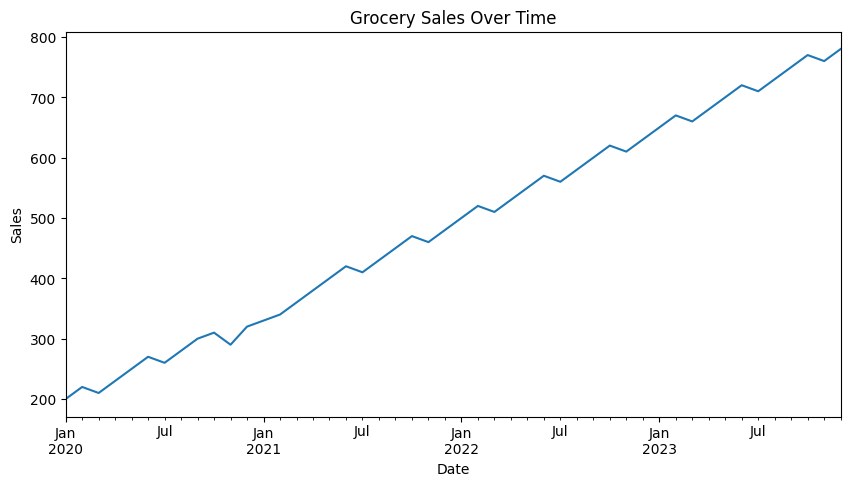

In [ ]:
df['sales'].plot(figsize=(10,5))
plt.title("Grocery Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

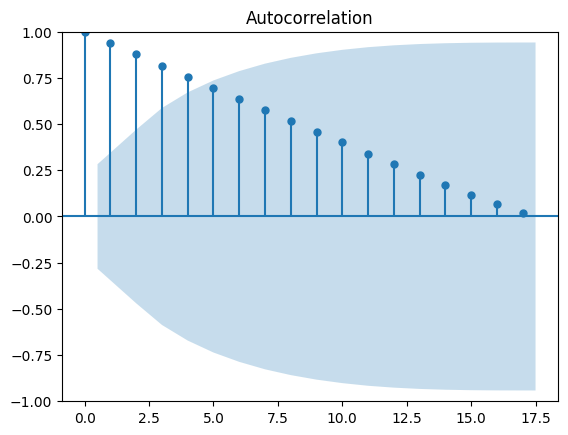

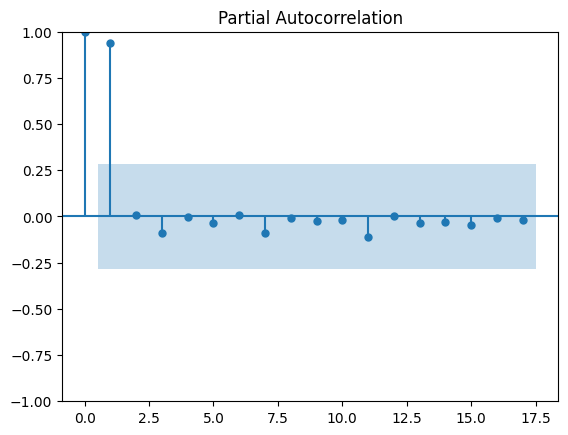

In [ ]:
plot_acf(df['sales'])
plot_pacf(df['sales'])
plt.show()

In [ ]:
model = ARIMA(df['sales'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -190.460
Date:                Tue, 13 Jan 2026   AIC                            386.919
Time:                        11:20:29   BIC                            392.470
Sample:                    01-31-2020   HQIC                           389.008
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2137.313      0.000       0.999       1.001
ma.L1         -0.9988      0.324     -3.078      0.002      -1.635      -0.363
sigma2       179.4146      0.002   9.89e+04      0.0

In [ ]:
forecast = model_fit.forecast(steps=6)
forecast

,predicted_mean
2024-01-31,792.029173
2024-02-29,804.058336
2024-03-31,816.087488
2024-04-30,828.116631
2024-05-31,840.145763
2024-06-30,852.174885


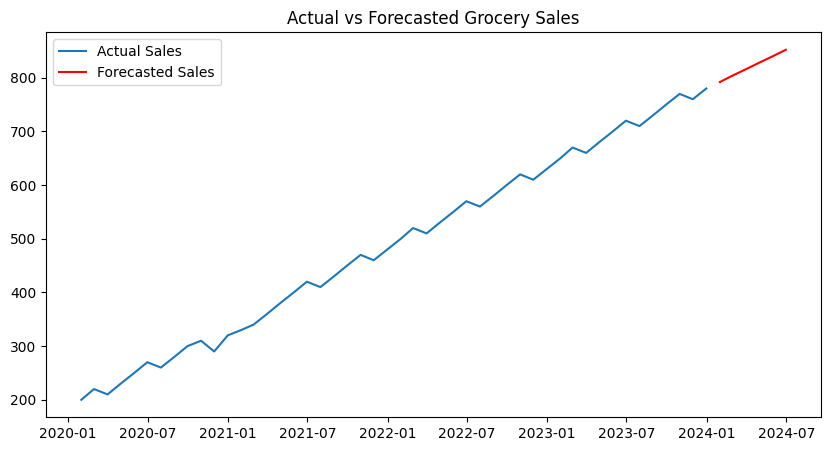

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['sales'], label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.legend()
plt.title("Actual vs Forecasted Grocery Sales")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(df['sales'],
                        order=(1,1,1),
                        seasonal_order=(1,1,1,12))

sarimax_fit = sarimax_model.fit()
sarimax_forecast = sarimax_fit.forecast(steps=6)

sarimax_forecast


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


,predicted_mean
2024-01-31,796.948409
2024-02-29,813.768952
2024-03-31,813.272677
2024-04-30,833.274208
2024-05-31,853.281586
2024-06-30,873.296542


EXPLANATION:
 *"I worked on a time series forecasting project using ARIMA and SARIMAX to predict grocery sales. I used Pandas for preprocessing, visualized trends,applied ACF and PACF plots to select parameters, and forecasted future sales."*